In [1]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import load_img,img_to_array

In [2]:
def load_images_from_folder(folder,target_size=(150,150)):
    images=[]
    for filename in os.listdir(folder):
        img_path=os.path.join(folder,filename)
        if os.path.isfile(img_path):
            img=load_img(img_path,target_size=target_size)
            img_array=img_to_array(img)
            images.append(img_array)
    return np.array(images)

In [3]:
train_dir=r'C:\Users\admin\Downloads\data\train'
test_dir=r'C:\Users\admin\Downloads\data\test'
train_cleaned=r'C:\Users\admin\Downloads\data\train_cleaned'

In [4]:
x_train=load_images_from_folder(train_dir)
x_test=load_images_from_folder(test_dir)
x_train_cleaned=load_images_from_folder(train_cleaned)

In [5]:
x_train = x_train / 255.0
x_test = x_test / 255.0
x_train_cleaned = x_train_cleaned / 255.0

In [8]:
x_train.shape

(144, 150, 150, 3)

In [9]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models

In [30]:
def create_denoising_autoencoder(input_shape):
    model = models.Sequential()

    model.add(layers.Flatten(input_shape=input_shape))
    
    # Encoder
    model.add(layers.Dense(1024, activation='relu'))
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dense(256, activation='relu'))

    # Bottleneck
    model.add(layers.Dense(128, activation='relu'))    
    # Decoder

    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dense(1024, activation='relu'))
    
    # Output layer
    model.add(layers.Dense(np.prod(input_shape), activation='sigmoid'))
    model.add(layers.Reshape(input_shape))  # Reshape back to original dimensions
    
    return model

In [36]:
y_train=x_train_cleaned
input_shape = (150, 150, 3)
autoencoder = create_denoising_autoencoder(input_shape)

# Compile the model
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Print the model summary
autoencoder.summary()

# Train the autoencoder
autoencoder.fit(x_train, y_train,  # Flattened input and target
                epochs=50,
                batch_size=20,
                shuffle=True,
                validation_split=0.1)  # Optional: Use a portion for validation

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 67500)             0         
                                                                 
 dense_42 (Dense)            (None, 1024)              69121024  
                                                                 
 dense_43 (Dense)            (None, 512)               524800    
                                                                 
 dense_44 (Dense)            (None, 256)               131328    
                                                                 
 dense_45 (Dense)            (None, 128)               32896     
                                                                 
 dense_46 (Dense)            (None, 256)               33024     
                                                                 
 dense_47 (Dense)            (None, 512)              

In [37]:
predict_flat=autoencoder.predict(x_test)
predictions=predict_flat.reshape(-1,150,150,3)

3/3 [==============================] - 0s 68ms/step


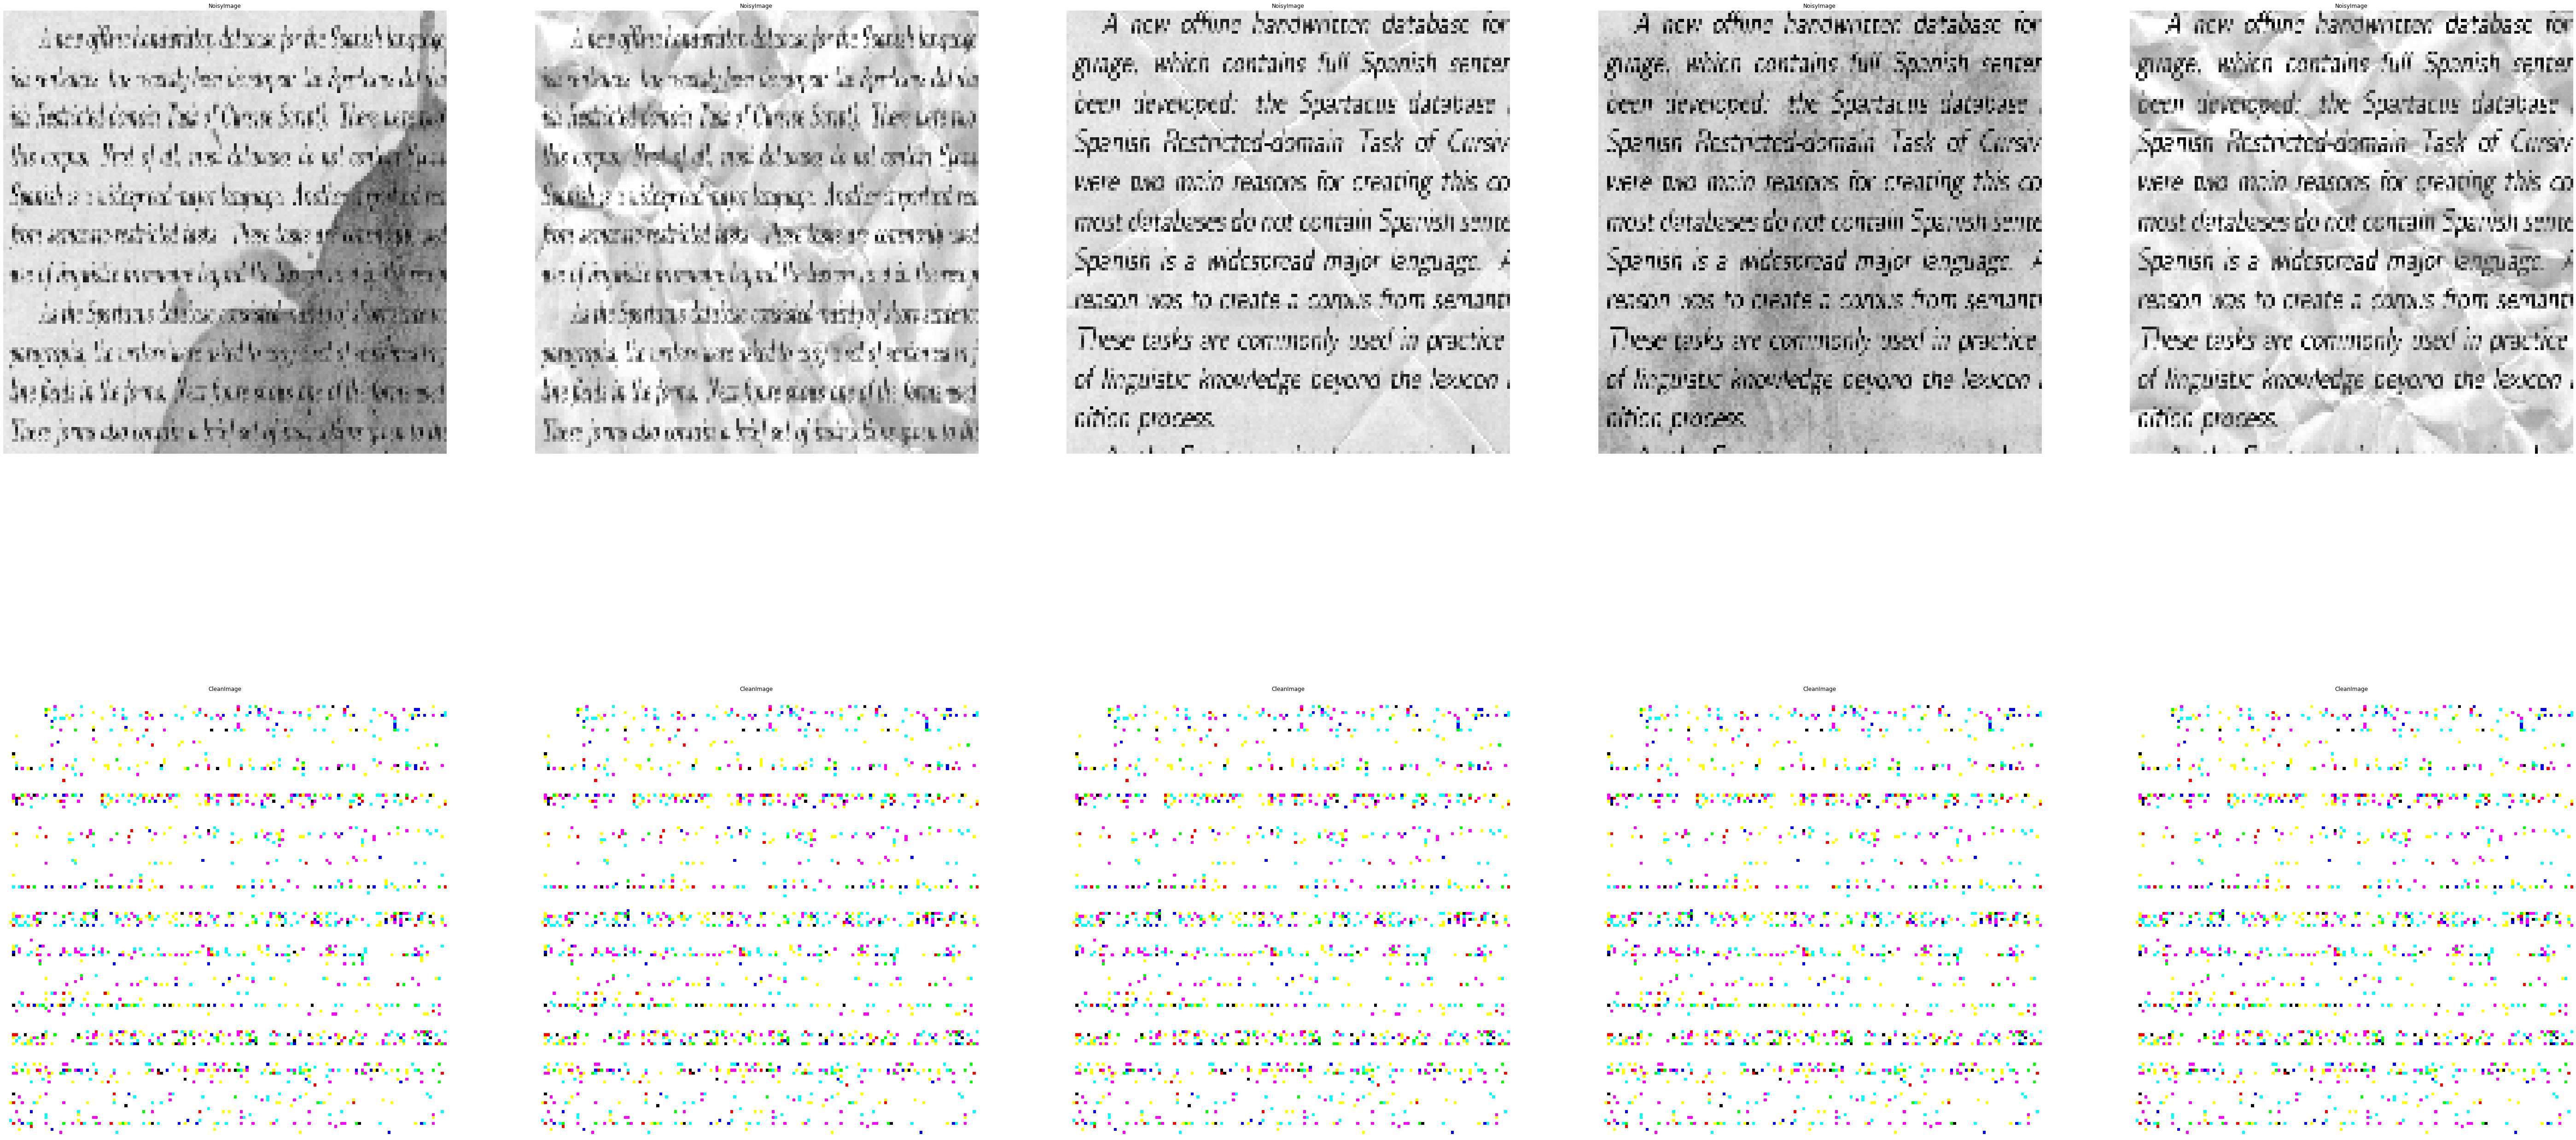

In [38]:
import matplotlib.pyplot as plt
n=5
plt.figure(figsize=(100,50))
for i in range(n):
    ax=plt.subplot(2,n,i+1)
    plt.imshow(x_test[i])
    plt.title('NoisyImage')
    plt.axis("off")
    
    ax=plt.subplot(2,n,i+1+n)
    plt.imshow(predictions[i])
    plt.title('CleanImage')
    plt.axis("off")
plt.show()